In [4]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def data_download(ticker,date,interval):
  start_date = pd.to_datetime(date)
  end_date = start_date + pd.Timedelta(days=8)

  data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
  return data

In [6]:
test1 = data_download("AMZN","2025-01-01","1d")
print(test1.head())
test2 = data_download(" GOOG","2025-01-10","5m")

print(test2.head())
test2.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AMZN        AMZN        AMZN        AMZN      AMZN
Date                                                                
2025-01-02  220.220001  225.149994  218.190002  222.029999  33956600
2025-01-03  224.190002  225.360001  221.619995  222.509995  27515600
2025-01-06  227.610001  228.839996  224.839996  226.779999  31849800
2025-01-07  222.110001  228.380005  221.460007  227.899994  28084200
2025-01-08  222.130005  223.520004  220.199997  223.190002  25033300
Price                           Close        High         Low        Open  \
Ticker                           GOOG        GOOG        GOOG        GOOG   
Datetime                                                                    
2025-01-10 14:30:00+00:00  196.199997  197.619995  194.940002  195.410004   
2025-01-10 14:35:00+00:00  194.324005  196.250000  194.320007  196.119995   
2025-01-10 14:40:00+00:00  194.470001  195.000000  193.949997  

Price                           Close        High         Low        Open  \
Ticker                           GOOG        GOOG        GOOG        GOOG   
Datetime                                                                    
2025-01-10 14:30:00+00:00  196.199997  197.619995  194.940002  195.410004   
2025-01-10 14:35:00+00:00  194.324005  196.250000  194.320007  196.119995   
2025-01-10 14:40:00+00:00  194.470001  195.000000  193.949997  194.320007   
2025-01-10 14:45:00+00:00  193.419998  194.589996  193.089996  194.434998   
2025-01-10 14:50:00+00:00  193.089996  193.551193  192.934998  193.410004   

Price                       Volume  
Ticker                        GOOG  
Datetime                            
2025-01-10 14:30:00+00:00  1560173  
2025-01-10 14:35:00+00:00   305549  
2025-01-10 14:40:00+00:00   316933  
2025-01-10 14:45:00+00:00   294436  
2025-01-10 14:50:00+00:00   244194

In [7]:
def volume_analysis(data, ticker, date, interval):
  d = data["Volume"].to_numpy().flatten()
  x_val = [i+1 for i in range(len(d))]
  x_vals = [str(date) for date in data.index]
  for i in range(len(x_vals)):
    d[i] = d[i]/1000000
  plt.bar(x_val,d, color = "blue")
  tit = ticker + " Volume Analysis"
  plt.title(tit)
  plt.xlabel('date Intervals from ' + date + ' to ' + x_vals[len(x_vals)-1])
  plt.ylabel('Volume/1000000')
  plt.show()


[*********************100%***********************]  1 of 1 completed


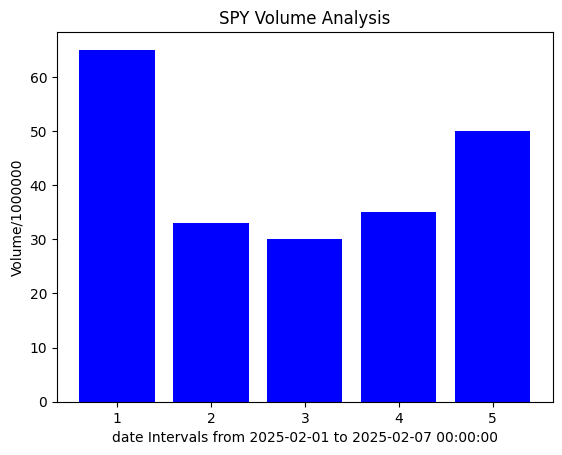

[*********************100%***********************]  1 of 1 completed


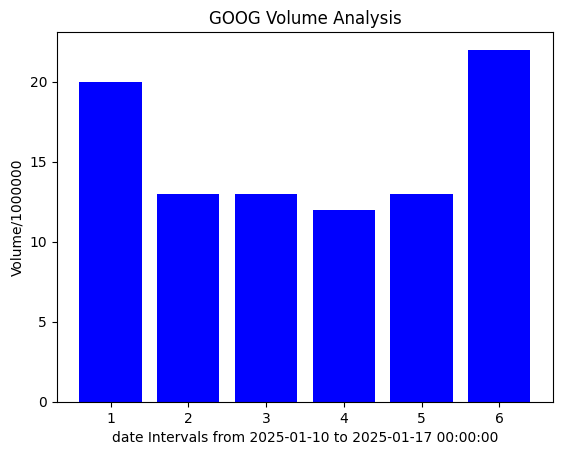

In [8]:
test1 = data_download("SPY","2025-02-01","1d")
volume_analysis(test1,"SPY","2025-02-01","1d")
test2 = data_download("GOOG","2025-01-10","1d")
volume_analysis(test2,"GOOG","2025-01-10","1d")


In [9]:
def price_analysis(data, ticker, date, interval):
  d = data[["Close","High", "Low","Open"]].to_numpy()
  x_vals = [str(date) for date in data.index]
  enddate =x_vals[-1]
  x_val = [i+1 for i in range(len(d))]
  meanlist = []
  for i in range(len(d)):
    meanlist.append(np.mean(d[i]))
    x_vals[i] = str(x_vals[i])[8:11]
    # print(meanlist)
  closelist = d[:,0]
  plt.plot(x_vals,meanlist, color = "blue", label = "Mean")
  plt.plot(x_vals,closelist, color = "green", label = "Close")
  tit = ticker + " Price Analysis"
  plt.title(tit)
  plt.xlabel('Days from ' + date + ' to ' + enddate)
  plt.ylabel('prices')
  plt.legend(loc = "best")
  plt.show()


[*********************100%***********************]  1 of 1 completed


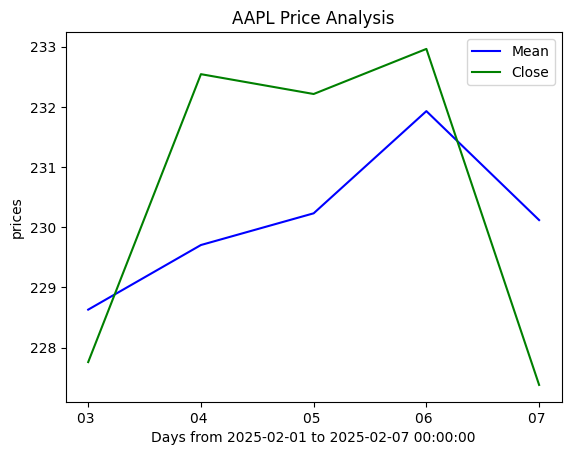

[*********************100%***********************]  1 of 1 completed


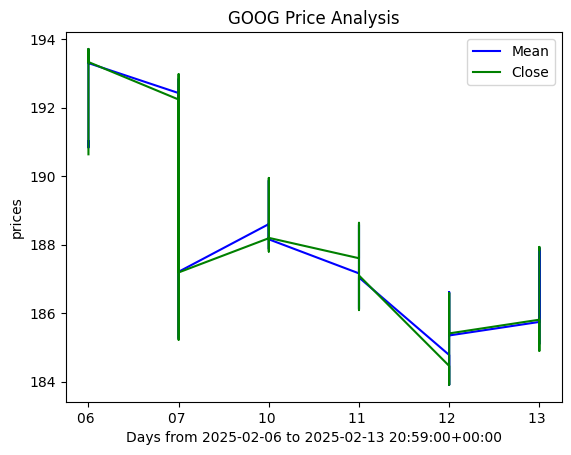

In [10]:
test1 = data_download("AAPL","2025-02-01","1d")
price_analysis(test1,"AAPL","2025-02-01","1d")
test2 = data_download("GOOG", "2025-02-06", "1m")
price_analysis(test2,"GOOG", "2025-02-06", "1m")

In [24]:
def violin_plots(data,ticker,date,interval):
  d = data[["Close","High", "Low","Open"]].to_numpy()
  plt.violinplot(d)
  plt.title("Violin Plots for " + ticker + " from " + str(date) + " to " + str(data.index[-1]))
  plt.xticks([1, 2, 3, 4], ["Close", "High", "Low", "Open"])
  plt.ylabel("Price")
  plt.show()
  plt.close()

[*********************100%***********************]  1 of 1 completed


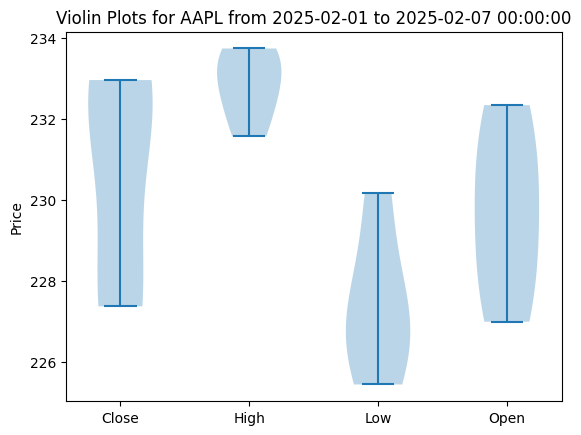

[*********************100%***********************]  1 of 1 completed


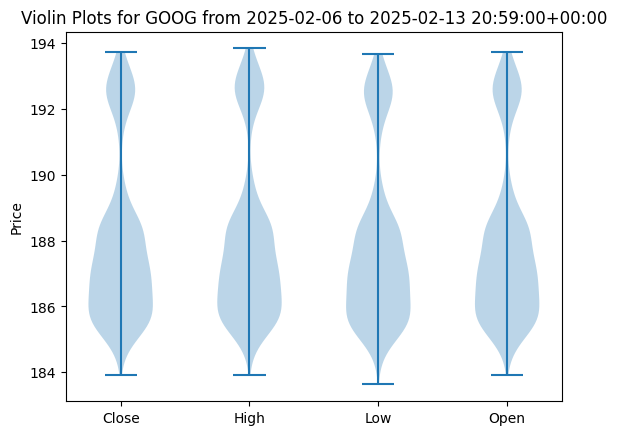

In [25]:
test1 = data_download("AAPL","2025-02-01","1d")
violin_plots(test1,"AAPL","2025-02-01","1d")
test2 = data_download("GOOG", "2025-02-06", "1m")
violin_plots(test2,"GOOG", "2025-02-06", "1m")